## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy import stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_table_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_table_df["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_table_df[merged_table_df.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_table_df[merged_table_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe_df = merged_table_df[merged_table_df['Mouse ID'] != 'g989']
clean_dataframe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe_df["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_dataframe_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM" : sem})
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean_dataframe_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_chart_df = clean_dataframe_df.groupby("Drug Regimen").count()
bar_chart_df


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


Text(0, 0.5, 'Number of Measurements Taken')

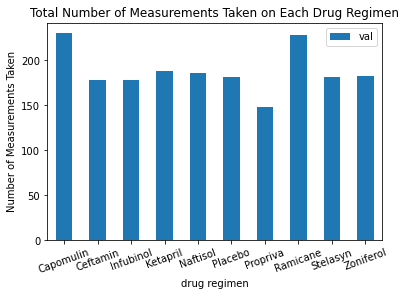

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df = pd.DataFrame({'drug regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 
                   'val':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df.plot.bar(x='drug regimen', y='val', rot=20)
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.ylabel('Number of Measurements Taken')


([<matplotlib.patches.Wedge at 0x7fb9274648b0>,
 [Text(0.013934097579311265, 1.0999117423341975, ''),
  Text(-0.0139340975793114, -1.0999117423341975, '')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

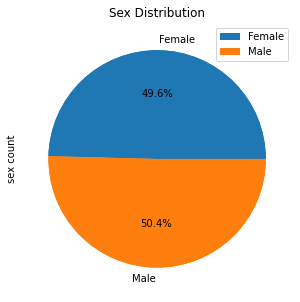

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = pd.DataFrame({'sex count': [123, 125]}, 
                   index=['Female', 'Male'])

plot = df.plot.pie(y='sex count', figsize=(5, 5))

plt.title("Sex Distribution")
sex_count = [123, 125]
plt.pie(sex_count, autopct='%1.1f%%')


(-1.1192168963081732,
 1.1079352522711863,
 -1.1167571903773796,
 1.1085810220189514)

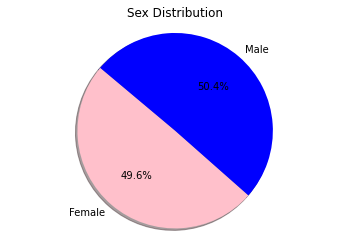

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

sizes = [123, 125]

colors = ["pink", "blue"]

plt.pie(sizes, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=140)

plt.title("Sex Distribution")

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [17]:
clean_dataframe_df['Mouse ID'].nunique()

248

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

qob_df = clean_dataframe_df[clean_dataframe_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
qob_df = qob_df.sort_values(["Timepoint"], ascending=False)
qob_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

qob2_data_df = qob_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
qob2_data_df
treatments = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumors_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for drug Infubinol is: {lowerq}")
print(f"The upper quartile of TTumor Volume for drug Infubinol: {upperq}")
print(f"The interquartile range of Tumor Volume for drug Infubinol: {iqr}")
print(f"The the median of Tumor Volume for drug Infubinol: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'tumors_Infubinol' is not defined

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax7.set_ylabel('Tumor Volume')
ax7.set_xlabel('Drug Regimen')
data = [tumors_Infubinol, tumors_Capomulin, tumors_Ramicane, tumors_Ceftamin]
plt.ylim(0, 80)
green_diamond = dict(markerfacecolor='g', marker='D')
ax7.boxplot(data, flierprops=green_diamond, labels=['Infubinol', 'Capomulin', 'Ramicane', 'Ceftamin',])

plt.show()


## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
test_df = clean_dataframe_df[clean_dataframe_df["Drug Regimen"].isin(["Capomulin"])]
test_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0.5, 1.0, 'Mouse s185 Tumor Volume vs. Time Point with Capomulin')

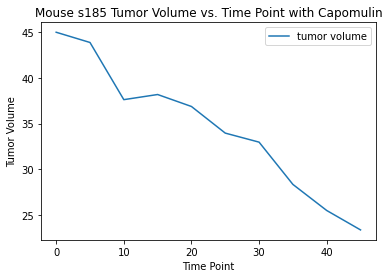

In [24]:
lineplt_df = pd.DataFrame({
   'tumor volume': [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
      }, index = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
lines = lineplt_df.plot.line()

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("Mouse s185 Tumor Volume vs. Time Point with Capomulin")

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = test_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatter_df


,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [26]:
avg_tumor_vol = scatter_df.groupby(scatter_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [27]:
unique_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].nunique()
unique_mouse_weight

Mouse ID
b128    1
b742    1
f966    1
g288    1
g316    1
i557    1
i738    1
j119    1
j246    1
l509    1
l897    1
m601    1
m957    1
r157    1
r554    1
r944    1
s185    1
s710    1
t565    1
u364    1
v923    1
w150    1
w914    1
x401    1
y793    1
Name: Weight (g), dtype: int64

In [28]:
clean_dataframe_df['Mouse ID'].nunique()
each_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].mean()
each_mouse_weight


Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

## Correlation and Regression

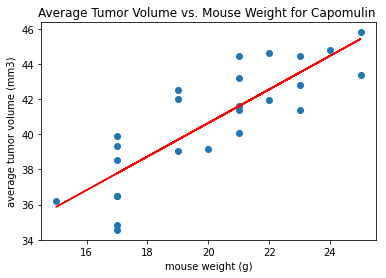

In [29]:
y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
model = st.linregress(each_mouse_weight,avg_tumor_vol)
y_values = each_mouse_weight*model[0]+model[1]
plt.plot(each_mouse_weight, y_values, color ='r')
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()

In [30]:
# Calculate the correlation coefficient and linear regression model # for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(each_mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr}.")





The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84.


In [31]:
# Linear regression


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values + slope + intercept
print(regress_values)


[44.50660022 43.50660022 39.50660022 41.50660022 44.50660022 46.50660022
 42.50660022 45.50660022 43.50660022 43.50660022 41.50660022 39.50660022
 41.50660022 47.50660022 39.50660022 47.50660022 39.50660022 45.50660022
 39.50660022 39.50660022 43.50660022 45.50660022 43.50660022 37.50660022
 39.50660022]


In [32]:
#Create line equation string

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.95x +21.55


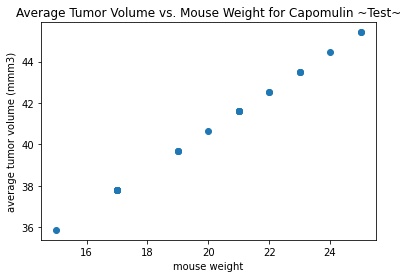

In [33]:
# Plot line to plot (real work for HW is above; this is a test!!)

# fit = 0.95 * x +21.55
plt.scatter(x_values, y_values)
# plt.plot(x_values, fit, "--")
# plt.xticks(year, rotation=90)
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume (mmm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ~Test~')
plt.show()